# COVID

- [COVID Data](https://data.cdc.gov/Case-Surveillance/United-States-COVID-19-Cases-and-Deaths-by-State-o/9mfq-cb36)

In [1]:
import pandas as pd
from datetime import datetime

df = pd.read_csv('./United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv')
df['submission_date'] = df['submission_date'].apply(lambda s: datetime.strptime(s, '%m/%d/%Y'))
df['submission_year'] = df['submission_date'].apply(lambda d: d.year)
df['submission_month'] = df['submission_date'].apply(lambda d: d.month)
df = df.groupby(['state', 'submission_year', 'submission_month']).agg('sum')
df = df[['new_case', 'new_death']]

df.shape

(1440, 2)

In [2]:
df.describe()

,new_case,new_death
count,1.440000e+03,1440.000000
mean,3.461054e+04,543.780556
std,6.899756e+04,1169.498842
min,-4.000000e+00,0.000000
25%,1.422500e+03,17.750000
50%,1.167900e+04,169.500000
75%,3.858550e+04,577.000000
max,1.018584e+06,16734.000000


In [3]:
df = df.reset_index()
df

,state,submission_year,submission_month,new_case,new_death
0,AK,2020,1,0.0,0.0
1,AK,2020,2,0.0,0.0
2,AK,2020,3,128.0,6.0
3,AK,2020,4,227.0,3.0
4,AK,2020,5,108.0,4.0
...,...,...,...,...,...
1435,WY,2021,8,9897.0,82.0
1436,WY,2021,9,15466.0,138.0
1437,WY,2021,10,12324.0,178.0
1438,WY,2021,11,8163.0,254.0


In [4]:
state_df = pd.read_csv('./state-population.csv')

state_abbreviations = set(state_df.abbreviation)
state_pop = {r.abbreviation: r['2020'] for _, r in state_df.iterrows()}

In [5]:
df = df[df.state.isin(state_abbreviations)].reset_index(drop=True)
df

,state,submission_year,submission_month,new_case,new_death
0,AK,2020,1,0.0,0.0
1,AK,2020,2,0.0,0.0
2,AK,2020,3,128.0,6.0
3,AK,2020,4,227.0,3.0
4,AK,2020,5,108.0,4.0
...,...,...,...,...,...
1219,WY,2021,8,9897.0,82.0
1220,WY,2021,9,15466.0,138.0
1221,WY,2021,10,12324.0,178.0
1222,WY,2021,11,8163.0,254.0


In [6]:
df['population'] = df.apply(lambda r: state_pop[r['state']], axis=1)

In [10]:
df['pnew_case'] = df.apply(lambda r: r.new_case / r.population, axis=1)
df['pnew_death'] = df.apply(lambda r: r.new_death / r.population, axis=1)

<AxesSubplot:ylabel='Density'>

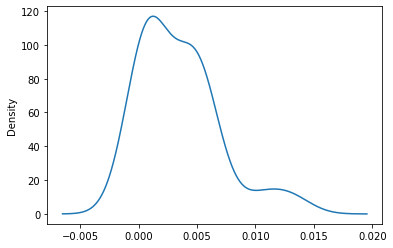

In [18]:
df[df.state == 'NY'].pnew_case.plot(kind='kde')

<AxesSubplot:ylabel='Density'>

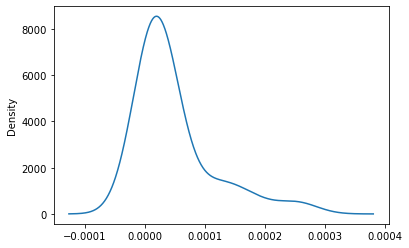

In [19]:
df[df.state == 'NY'].pnew_death.plot(kind='kde')